In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Dropout, MaxPool2D, Flatten
from keras.activations import relu, softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard,ModelCheckpoint
import tensorboard

from scipy import misc
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import time

Using TensorFlow backend.


In [2]:

batchSize = 32
targetSize = 64
dropOut = 0.5

model = Sequential()
model.add(Convolution2D(filters = 64, kernel_size= (3,3), input_shape= (targetSize,targetSize,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Convolution2D(filters =64, kernel_size= (3,3),activation = 'relu', ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(dropOut))

model.add(Dense(units = 4, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(targetSize, targetSize),
    batch_size=batchSize,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(targetSize, targetSize),
    batch_size=batchSize,
    class_mode='categorical')

checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=False)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,batch_size = batchSize, write_grads=True, write_images=True)

model.fit_generator(
    training_set,
    max_queue_size=10,
    workers = 10,
    steps_per_epoch=8000/batchSize,
    epochs=10,
    validation_data=test_set,
    validation_steps=2000/batchSize,callbacks=[tensorboard] )

Found 621 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Epoch 1/10
250/250 [==============================] - 14s 56ms/step - loss: 0.0165 - acc: 0.9940 - val_loss: 0.2269 - val_acc: 0.9756
Epoch 2/10
250/250 [==============================] - 13s 54ms/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0953 - val_acc: 0.9748
Epoch 3/10
250/250 [==============================] - 13s 54ms/step - loss: 0.0118 - acc: 0.9956 - val_loss: 0.2489 - val_acc: 0.9748
Epoch 4/10
250/250 [==============================] - 14s 56ms/step - loss: 0.0140 - acc: 0.9950 - val_loss: 0.2693 - val_acc: 0.9752
Epoch 5/10
250/250 [==============================] - 14s 54ms/step - loss: 0.0140 - acc: 0.9954 - val_loss: 0.2568 - val_acc: 0.9686
Epoch 6/10
250/250 [==============================] - 14s 55ms/step - loss: 0.0202 - acc: 0.9943 - val_loss: 0.2986 - val_acc: 0.9627
Epoch 7/10
250/250 [==============================] - 14s 56ms/step - loss: 0.0291 - acc: 0.9912 - val_loss: 0.1044

In [10]:
model.save("./models/{}".format(time.time()))

In [11]:
def readImages(path,imgRows, imgCols,channels):
    newPath = path # [folder for folder in listdir(path) if not isfile(join(path,folder))]
    
    allImages = []

    images = [f for f in listdir(newPath) if (isfile(join(newPath, f)) and (f[-4:]==".jpg" or f[-4:]==".png"))]

    for img in images:
        tmpPath = join(newPath, img)
        if channels == 1:
            img = misc.imread(tmpPath,'F')
        else: 
            img = misc.imread(tmpPath)
        img = misc.imresize(img, (imgRows,imgCols))
        img = img.astype(np.float32)
        img /= 255.
        img = np.reshape(img, (imgRows, imgCols,channels))
        allImages.append(img)
    return np.array(allImages)

test = readImages("./dataset/test",64,64,3)

In [30]:
xTest = test
print (type(test))
print (test.shape)

<class 'numpy.ndarray'>
(225, 64, 64, 3)


In [22]:
%%time
data = model.predict_classes(xTest,batch_size = 16)

Wall time: 62.2 ms


In [24]:
print(data)
print (data.argmax(axis=-1))

[2 2 2 2 2 2 2 3 2 2 0 3 2 3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 3 2 2 2 2 2 2 2 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 2 3 2 2 3 2 2 3 0 2 0 0 0 2 3 3 3 3 2 3 3 2 2 2 3 2 2 2 2 3 0
 3 3 3 3 3 0 0 3 2 3 2 3 2 2 2 3 3 0 3 3 2 2 2 3 2 3 3 2 2 2 2 3 2 2 3 3 3
 2 2 3 2 2 3 2 2 2 2 3 2 3 3 2 2 3 2 3 2 3 3 2 3 2 2 2 2 3 3 2 2 3 3 2 3 2
 3 3 2 2 2 2 2 0 3 3 2 3 3 3 2 2 2 2 0 3 2 3 2 3 2 3 2 2 2 2 3 3 2 2 2 0 3
 2 3 2]
7


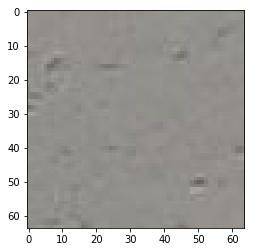

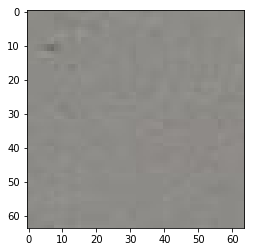

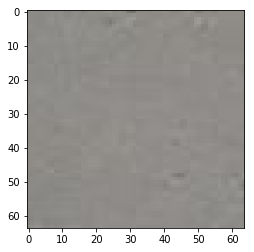

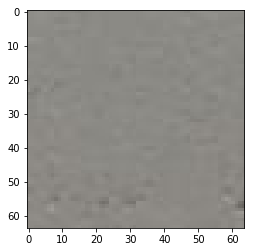

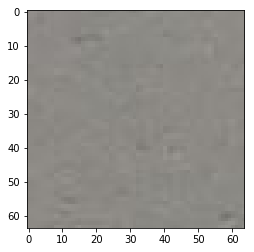

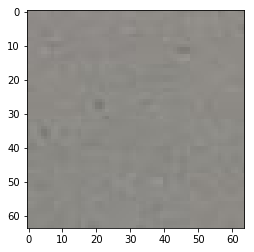

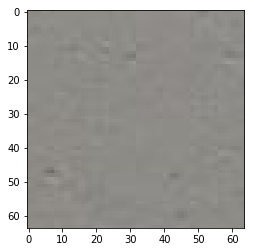

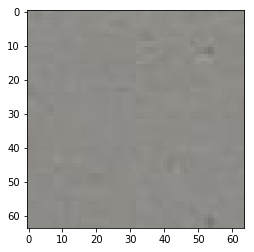

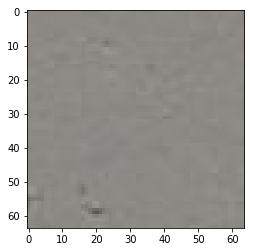

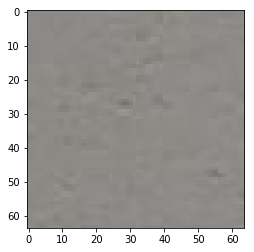

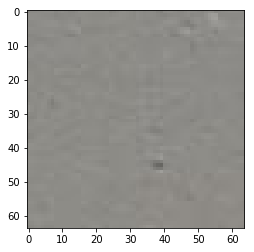

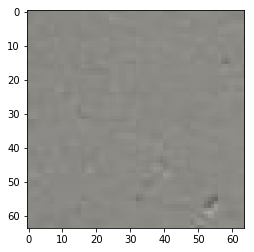

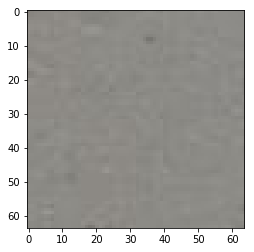

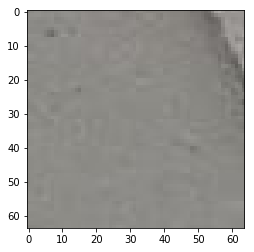

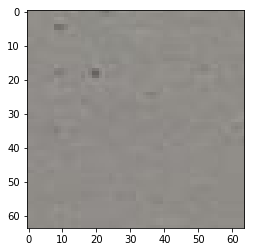

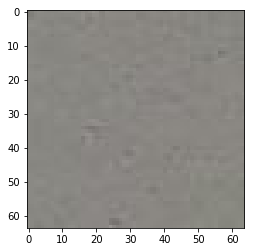

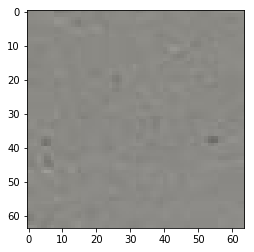

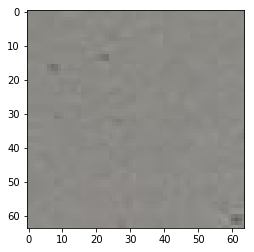

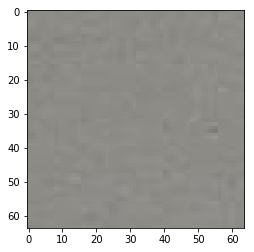

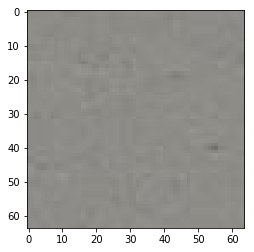

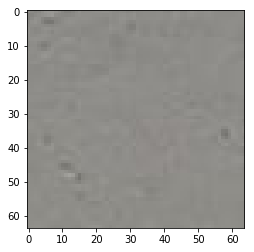

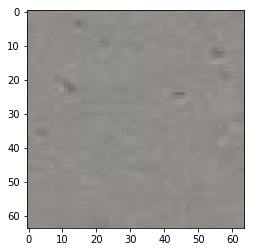

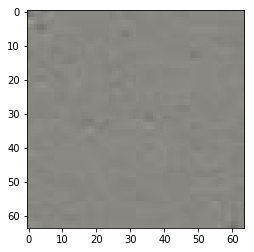

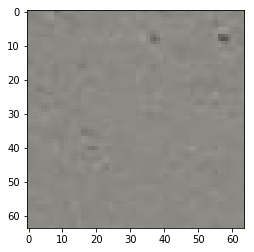

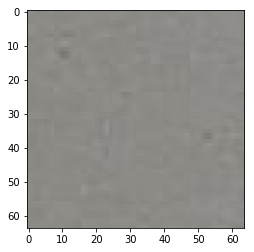

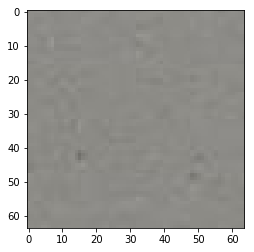

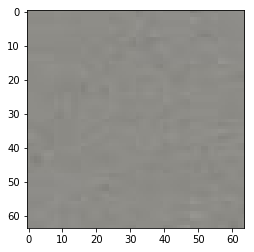

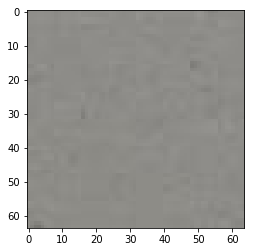

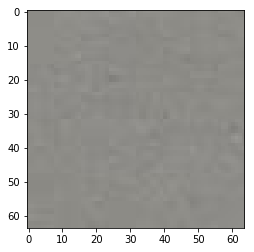

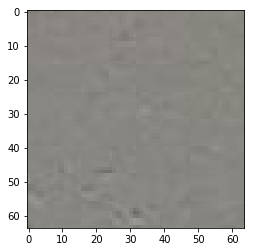

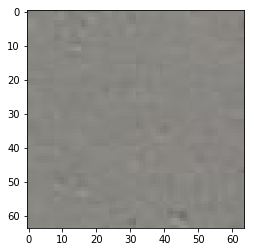

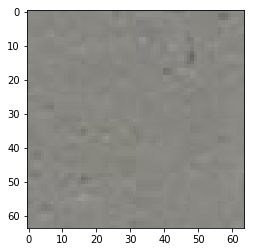

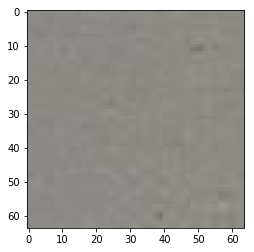

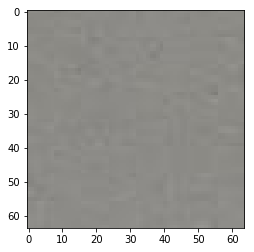

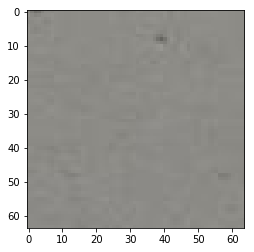

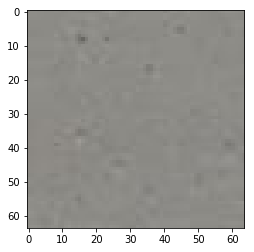

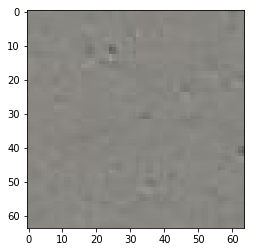

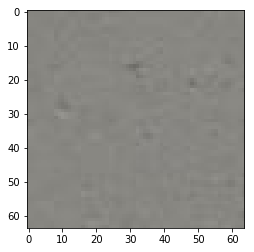

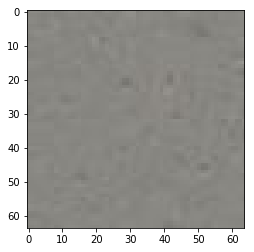

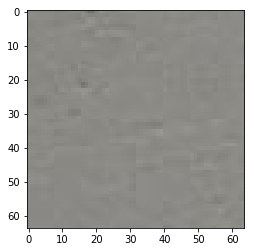

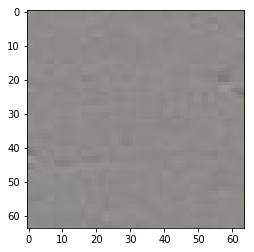

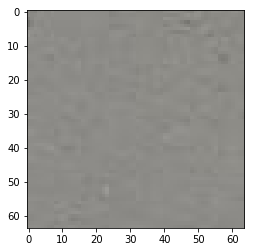

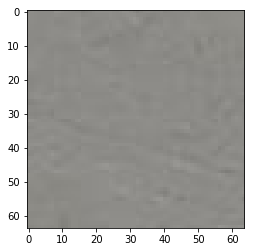

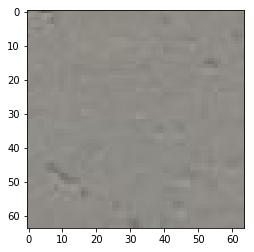

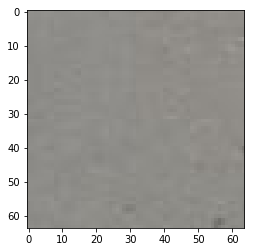

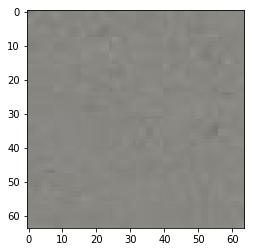

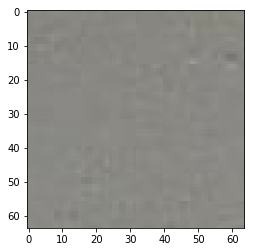

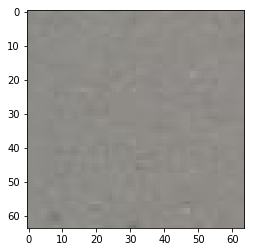

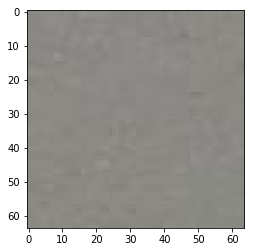

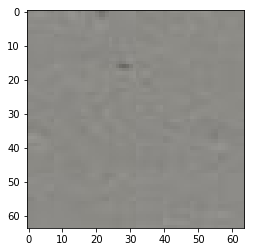

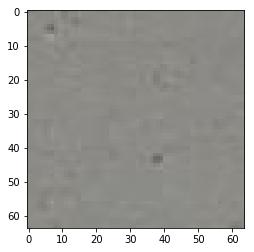

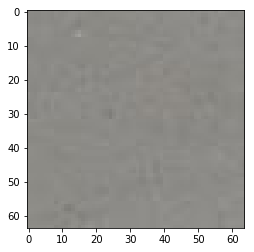

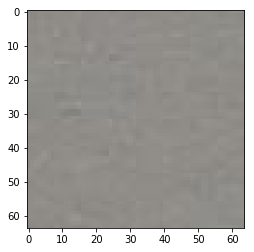

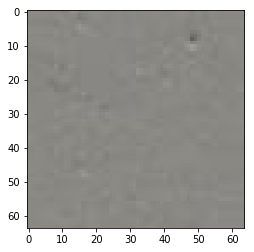

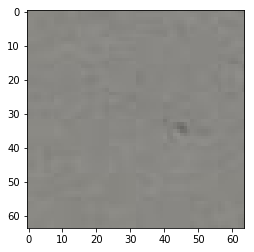

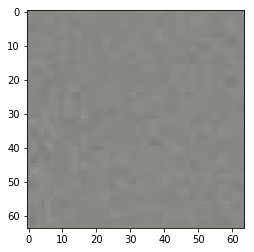

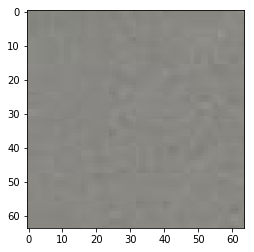

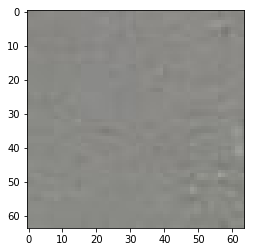

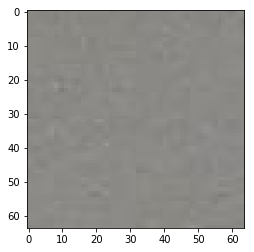

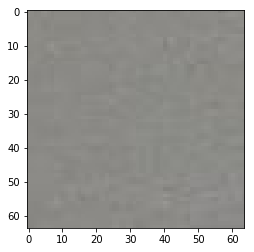

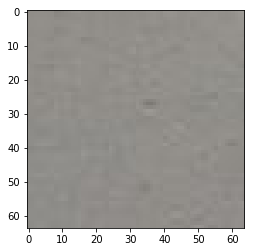

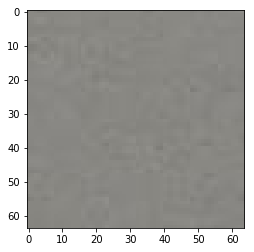

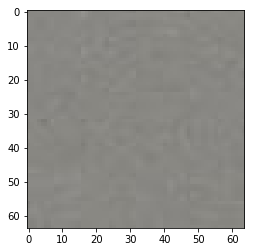

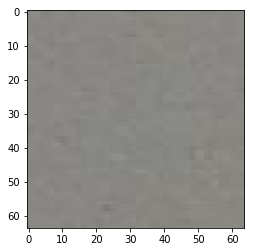

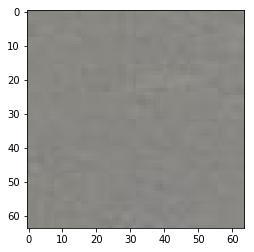

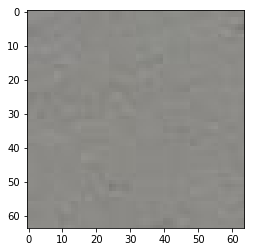

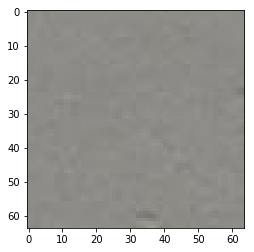

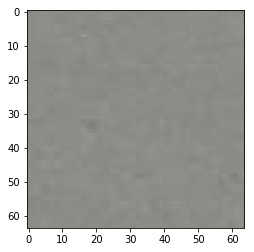

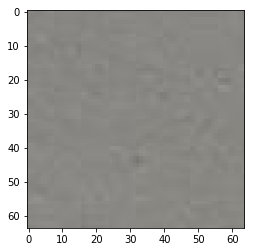

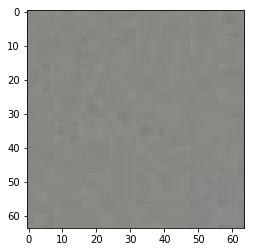

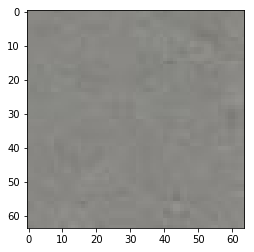

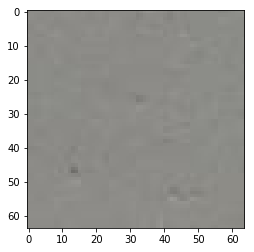

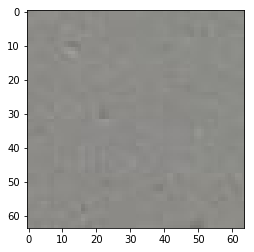

In [28]:
for i in range(data.shape[0]):
    if data[i] == 3:
        plt.imshow((test[i]))
        plt.show()